In [9]:
import tensorflow
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import make_moons
import numpy as np 
import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions 
import seaborn as sns 
from keras.regularizers import l2

In [10]:
x,y=make_moons(n_samples=500,noise=0.25,random_state=2)

<Axes: >

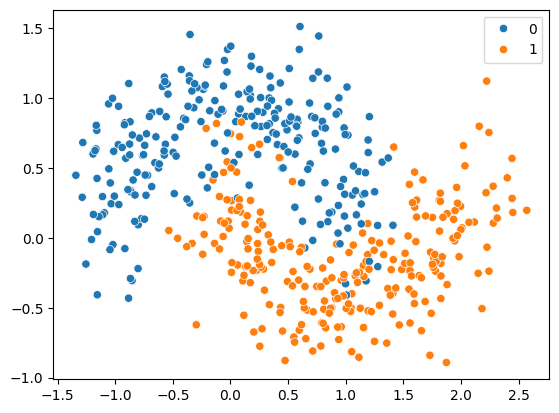

In [11]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [16]:
model=Sequential()

adam=Adam(learning_rate=0.001)
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               384       
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history=model.fit(x,y,validation_split=0.2,epochs=2000,verbose=1)

Epoch 1/2000
13/13 [==============================] - 1s 24ms/step - loss: 0.0325 - accuracy: 0.9850 - val_loss: 0.2145 - val_accuracy: 0.9300
Epoch 2/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0332 - accuracy: 0.9825 - val_loss: 0.2164 - val_accuracy: 0.9300
Epoch 3/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.2172 - val_accuracy: 0.9300
Epoch 4/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0329 - accuracy: 0.9875 - val_loss: 0.2122 - val_accuracy: 0.9300
Epoch 5/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0385 - accuracy: 0.9850 - val_loss: 0.2218 - val_accuracy: 0.9200
Epoch 6/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.0358 - accuracy: 0.9900 - val_loss: 0.2230 - val_accuracy: 0.9300
Epoch 7/2000
13/13 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.9875 - val_loss: 0.2258 - val_accuracy: 0.9300
Epoc

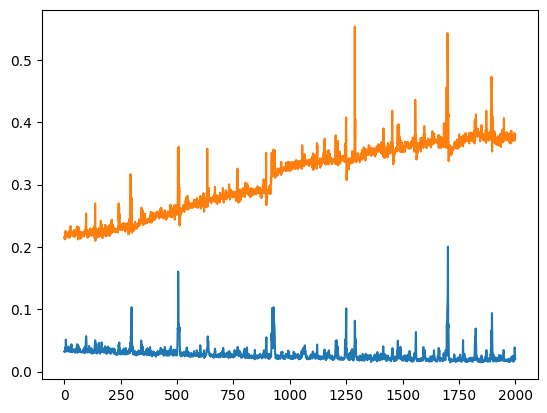

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

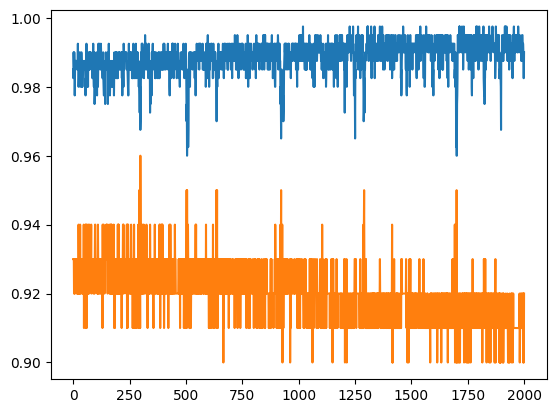

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

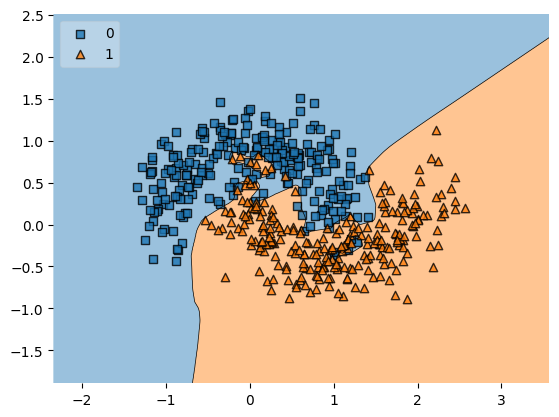

In [22]:
plot_decision_regions(x,y.astype(int),clf=model,legend=2)

In [33]:
model1=Sequential()
adam=Adam(learning_rate=0.03)
model1.add(Dense(128,activation='relu',input_dim=2,kernel_regularizer=l2(0.01)))
model1.add(Dense(128,activation='relu',kernel_regularizer=l2(0.01)))
model1.add(Dense(1,activation='sigmoid'))

In [34]:
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history=model1.fit(x,y,epochs=2000,verbose=1,validation_split=0.2)

Epoch 1/2000
13/13 [==============================] - 2s 26ms/step - loss: 0.8791 - accuracy: 0.8175 - val_loss: 0.5760 - val_accuracy: 0.8000
Epoch 2/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4852 - accuracy: 0.8850 - val_loss: 0.4904 - val_accuracy: 0.8100
Epoch 3/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.4005 - accuracy: 0.8875 - val_loss: 0.4183 - val_accuracy: 0.8300
Epoch 4/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3823 - accuracy: 0.8800 - val_loss: 0.4716 - val_accuracy: 0.8500
Epoch 5/2000
13/13 [==============================] - 0s 6ms/step - loss: 0.3752 - accuracy: 0.8825 - val_loss: 0.4233 - val_accuracy: 0.8400
Epoch 6/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3865 - accuracy: 0.8775 - val_loss: 0.4139 - val_accuracy: 0.8400
Epoch 7/2000
13/13 [==============================] - 0s 7ms/step - loss: 0.3886 - accuracy: 0.8700 - val_loss: 0.4589 - val_accuracy: 0.8300
Epoch

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

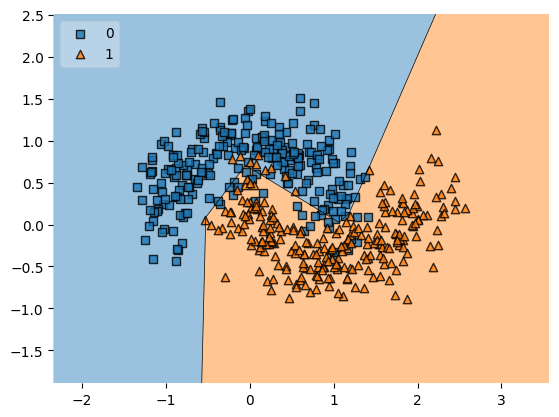

In [35]:
plot_decision_regions(x,y.astype(int),clf=model1,legend=2)

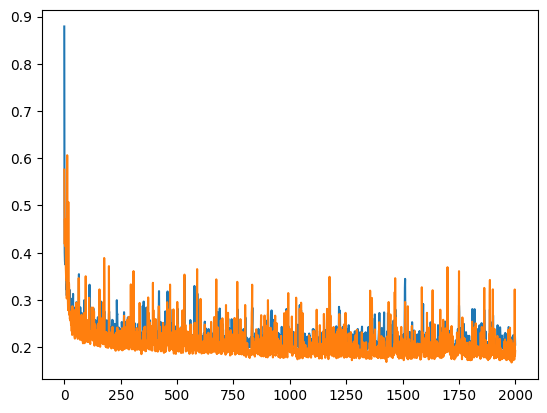

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

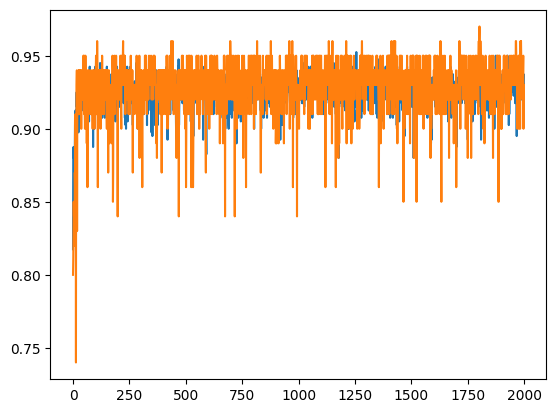

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

<Axes: >

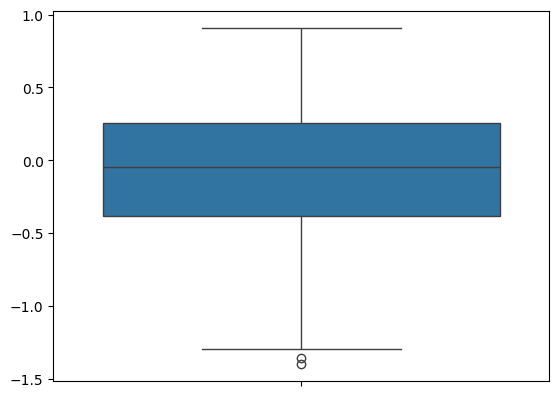

In [45]:
x=model.get_weights()[0].reshape(256)
sns.boxplot(x)

<Axes: >

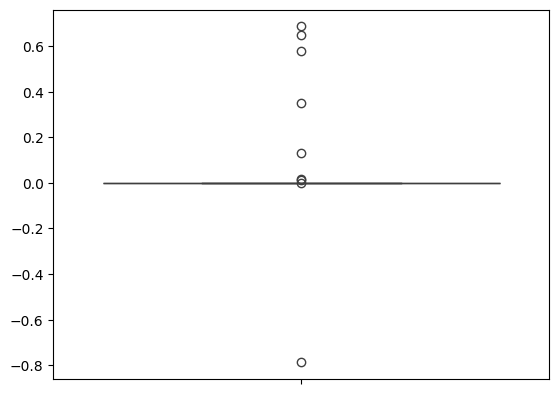

In [47]:
a=model1.get_weights()[0].reshape(256)
sns.boxplot(a)

C:\Users\SDS\AppData\Local\Temp\ipykernel_27248\3894538142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)
C:\Users\SDS\AppData\Local\Temp\ipykernel_27248\3894538142.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a)


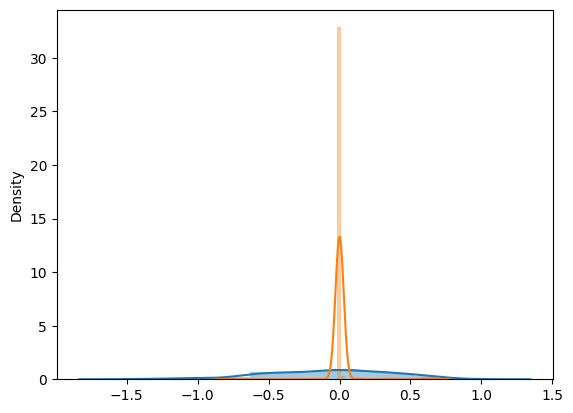

In [50]:
sns.distplot(x)
sns.distplot(a)
plt.show()